### 데이터 사전 처리(Preprocessing)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('./data/house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet (전용면적 같은 의미)
    
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

LotArea: Lot size in square feet (전체 면적의 크기)
    
GarageArea: Size of garage in square feet (차고의 크기)
    
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date (건축연도)

Neighborhood: Physical locations within Ames city limits (거주지역)

   Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   .....

RoofMatl: Roof material (지붕재질)-(우리나라는 거의 아파트라서 별로 중요하지 않을 것 같지만 외국은 단독주택이 많으므로)
	ClyTile	Clay or Tile
	CompShg	Standard (Composite) Shingle
	Membran	Membrane
	Metal	Metal
	.....

RoofStyle: Type of roof
	Flat	Flat
	Gable	Gable
	Gambrel	Gabrel (Barn)
	.....

**데이터 타입과 Null 값 갯수 확인**

In [280]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [281]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))
# 확인해보니, object 컬럼이 43개 꽤 많고, Null값이 너무 많은 컬럼들은 삭제하는 게 좋을 것 같음 

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


**타겟값 SalePrice의 분포도 확인**  
회귀에서 중요한 부분!!! 타겟값이 정규분포를 띄고 있는지 확인하기!

<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

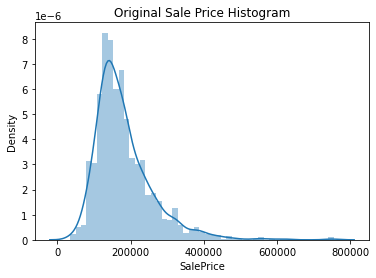

In [282]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])
# 확인해보니 오른쪽 꼬리가 긴(롱테일) skew된 형태임(양의 왜도). 그래서 밑에서 로그변환 해보고 분포도 다시 확인

**로그 변환을 통해 SalePrice 값 분포도 확인**

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

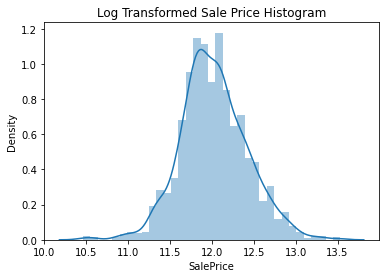

In [283]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
#log가 아니라 log1p를 하는 이유는 log는 인자가 0값이 들어가면 마이너스 무한대가 나올 수 있기 때문에
#안전하게 로그변환 하기 위해서는, log1p를 사용하는 게 좋음!
sns.distplot(log_SalePrice)
#정규분포에 가까운 분포의 모습을 보임

**타겟값인 Price를 로그변환하여 정규 분포 형태로 변환하고, 피처들 중 숫자형 컬럼의 Null값 데이터 처리**

In [284]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

# Drop 하지 않는 Null컬럼들 중, 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True) #mean()은 숫자형 컬럼에만 적용됨(그러므로, 숫자형 컬럼만 null값을 평균값으로 대체)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index]) #이때 [] 은 row 슬라이싱 
#(숫자형 컬럼은 평균으로 null값을 대체했기 때문에 object컬럼들만 null값이 있게 됨)

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [285]:
a = null_column_count.index # null값이 있는 object 칼럼명을 a 변수로 만들어줌(pd.get_dummies의 columns인자에 넣으려고)
a.shape

(11,)

In [286]:
# null값이 없는 피처명 출력하기 위한 작업 과정 
notnull_column_count = house_df.isnull().sum()[house_df.isnull().sum() <= 0]
b = notnull_column_count.index

In [287]:
#b에서 null값이 없는 object 칼럼명을 추출하기 위한 과정_c 변수로 만들어줌(pd.get_dummies의 columns인자에 넣으려고)
c= house_df[b].dtypes[house_df[b].dtypes == object].index 
c.shape

(27,)

**문자열값은 모두 카테고리값. 판다스의 get_dummies( )를 이용하여 원-핫 인코딩 수행**

In [288]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df, columns = a, dummy_na=True) #null값이 있는 object컬럼들만 dummy_na=True 해줘야 함 
#(dummy_na=True를 해줘야, null값도 그 컬럼들의 하나의 값으로 보고, '기존컬럼명_nan' 이런식으로 컬럼 만들어줘서 원핫인코딩 해줌)
house_df_ohe = pd.get_dummies(house_df_ohe, columns = c, dummy_na=False)
#(null값 없는 object컬럼에서도 '기존컬럼명_nan' 컬럼이 쓸데없이 만들어지기 때문에)
#(다시 pd.get_dummies 해줄 때에는 null값 없는 object 컬럼들이므로 dummy_na=False 해주고 원핫인코딩 하면 됨)
# house_df_ohe = pd.get_dummies(house_df_ohe, dummy_na=False) 
# 4번코드 대신 7번코드로 해줘도 됨(get_dummies는 별도로 컬럼지정 안해줘도 object컬럼만 원핫인코딩 해주기 때문에)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])


get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 282)
## Null 피처의 Type :
 Series([], dtype: object)


In [289]:
# 원한인코딩을 통해, null값 있는 object컬럼에서 null값을 하나의 값으로 보고 '기존컬럼명_nan' <-이러한 컬럼이 만들어진 것을 확인
print(house_df_ohe.columns[house_df_ohe.columns.str.contains("nan")])
house_df_ohe.columns[house_df_ohe.columns.str.contains("nan")].shape

#기존 43개 object 컬럼에서 삭제한 컬럼 6개 중 5개가 object였으므로, 43-5= 38개임. 
#38개의 objcet칼럼에서 null값 있는 칼럼은 11개였으므로 '기존컬럼명_nan'은 11개 만들어짐. 

Index(['MasVnrType_nan', 'BsmtQual_nan', 'BsmtCond_nan', 'BsmtExposure_nan',
       'BsmtFinType1_nan', 'BsmtFinType2_nan', 'Electrical_nan',
       'GarageType_nan', 'GarageFinish_nan', 'GarageQual_nan',
       'GarageCond_nan'],
      dtype='object')


(11,)

### 선형 회귀 모델의 학습/예측/평가

**RMSE 평가 함수 생성**

In [290]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse
# 위에서 타겟값을 로그변환 해줬었기 때문에 '로그변환된' 이라고 하는 것임.

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#### (아무것도 안하고 기본으로) LinearRegression, Ridge, Lasso 학습, 예측, 평가

In [291]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.1318957657914727, 0.12769052235054001, 0.1762825055647141]

**회귀 계수값과 컬럼명 시각화를 위해 상위 10개, 하위 10개(-값으로 가장 큰 10개) 회귀 계수값과 컬럼명을 가지는 Series생성 함수 만들기**  

In [292]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


**인자로 입력되는 여러개의 회귀 모델들에 대한 회귀계수값과 컬럼명 시각화 함수 만들기**

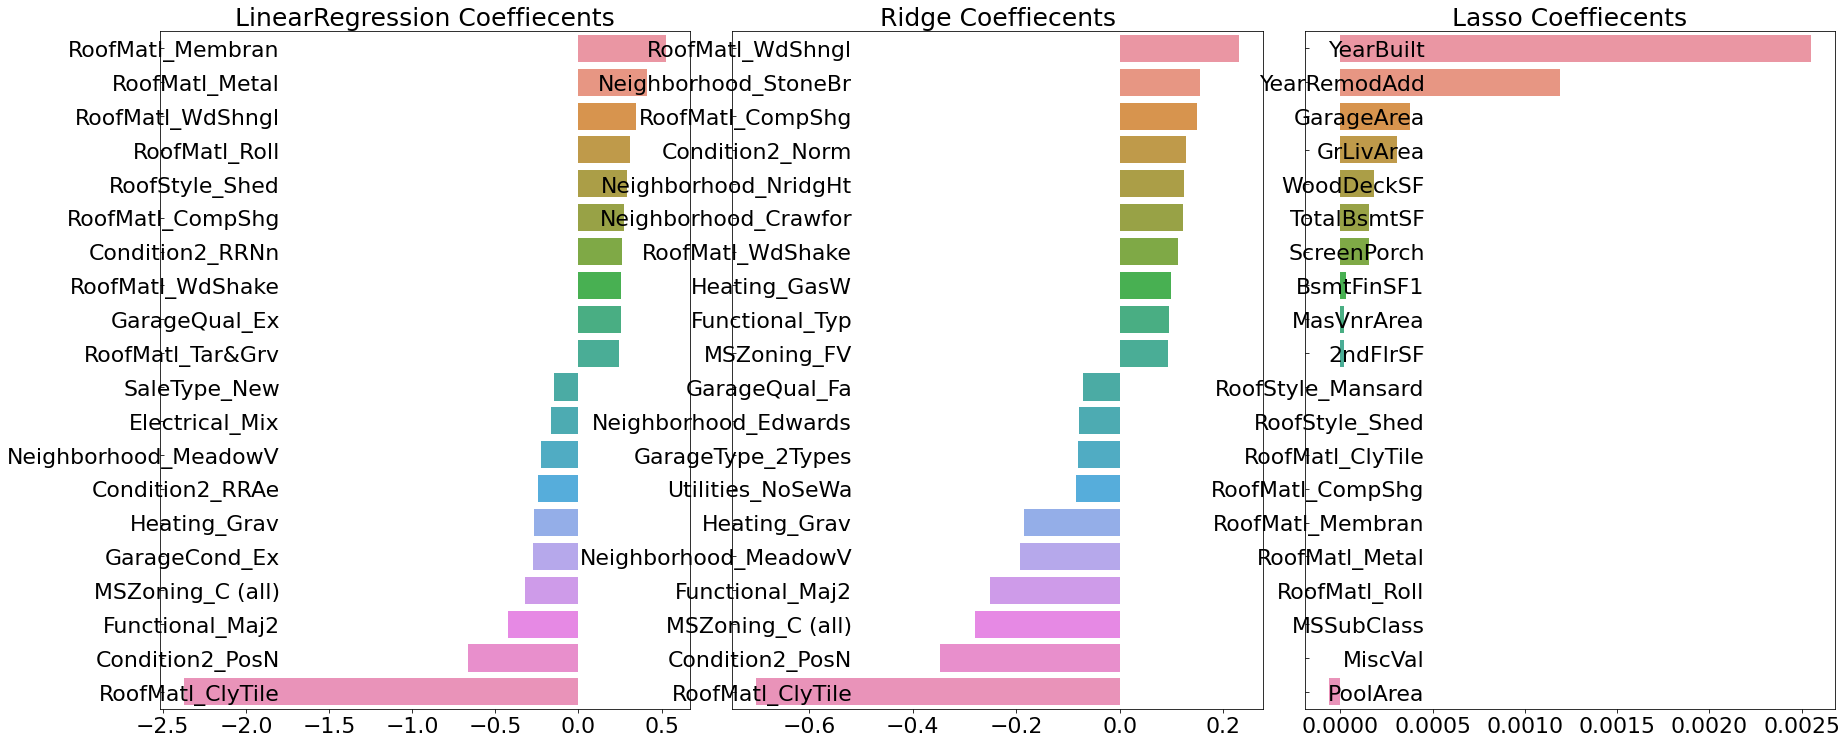

In [293]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() #subplots으로 여러 그래프 그릴 때 간격조정 위해서 쓰이는 tight_layout
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()): #질문) 이 코드 이해가 잘 안됨ㅠ
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


fig.tight_layout() 관련 참고: https://blog.naver.com/flunatic/222155349609  
(시각화 관련 정보 많음)

**5 폴드 교차검증으로 모델별로 RMSE와 평균 RMSE출력**

In [294]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [1.3400000e-01 1.6500000e-01 1.6800000e-01 2.1118946e+04 1.9800000e-01]
LinearRegression CV 평균 RMSE 값: 4223.922

Ridge CV RMSE 값 리스트: [0.117 0.155 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


#### 각 모델들의 alpha값을 변경하면서 하이퍼 파라미터 튜닝 후 다시 재 학습/예측/평가

In [296]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


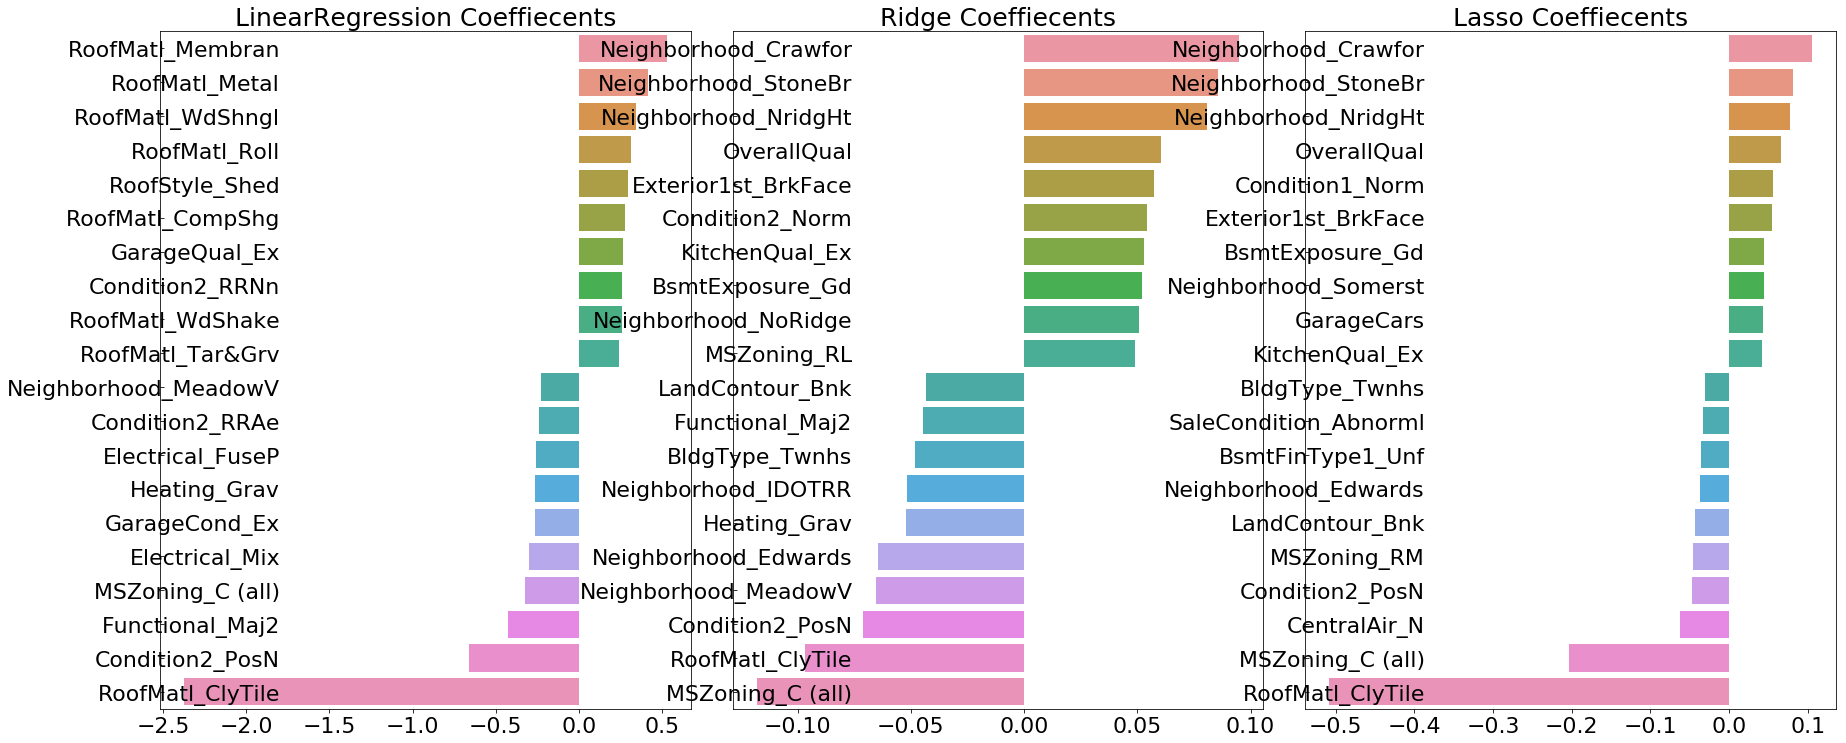

In [16]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### 피처엔지리어링하고 다시 하이퍼 파라미터 튜닝 후 재 학습/예측/평가 

**숫자 피처들에 대한 데이터 분포 왜곡도 확인 후 높은 왜곡도를 가지는 피처 추출**

In [303]:
from scipy.stats import skew
#(scipy의 skew 함수는 skew의 인자로 데이터값들을 넣어주면 그 데이터값들의 왜곡도를 반환해줌)

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출(숫자형 피처들만 왜곡도를 구하기 때문)
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
#(house_df_ohe에서는 object 피처들을 모두 원핫인코딩을 통해 숫자형 피처로 바꿨기 때문에 house_df에서 숫자형 피처를 찾아줘야 함)

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))# 각 컬럼들이 x인자로 들어감
#(각 컬럼별로 왜곡도가 반환됨)

# skew 정도가 1 이상인 컬럼들만 추출.(skew값이 가장 작은값이 -0.667이라서 음의 왜도는 고려안한 것)
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


**-양의 왜도만 고려한 이유?)**  
보통 업무적인 데이터의 skew는 오른쪽(positive) long tail이 많습니다. 그리고 log transformation은 오른쪽 long tail 일때만 적용합니다.  만약 원본 값에 - 값이 있다면 log의 정의로 인하여 log값으로 변환할 수 없습니다.  
left skew인 경우는 업무적으로 그렇게 많지 않지만 이를 보정할 방법도 효율적이진 않습니다. 보통  제곱 변환(square transformation)을 하지만 그렇게 효율적인 방법은 아닙니다. 때문에 보통 left skew는 잘 변환하지 않습니다.

**왜곡도가 1보다 큰 피처들은 로그 변환 적용(정규분포 형태로 만들기위해)하고 다시 하이퍼 파라미터 튜닝 후 재 학습/예측/평가**

In [312]:
#왜곡도가 1보다 큰 피처들은 로그 변환 적용
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [305]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df, columns=a, dummy_na=True)
house_df_ohe = pd.get_dummies(house_df_ohe, columns=c, dummy_na=False)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1274, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1251, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.12
Lasso 로그 변환된 RMSE: 0.117


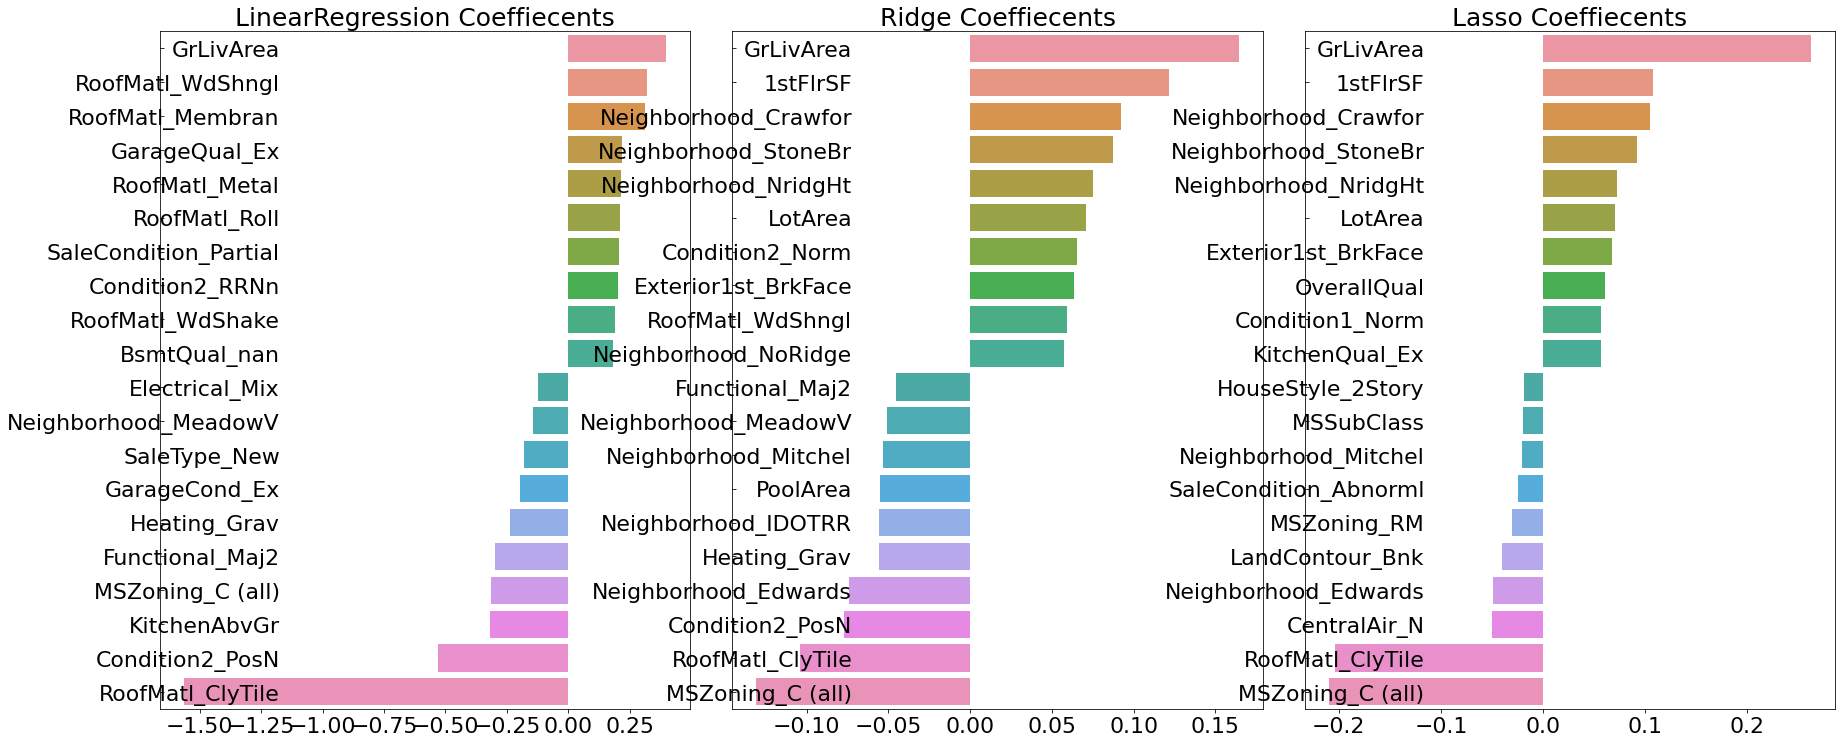

In [314]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#### 이상치 데이터 삭제 후 재 학습/예측/평가 

**이상치 데이터 검출을 위해 타겟값에 영향을 미치는 주요 피처인 GrLivArea값에 대한 산포도 확인**

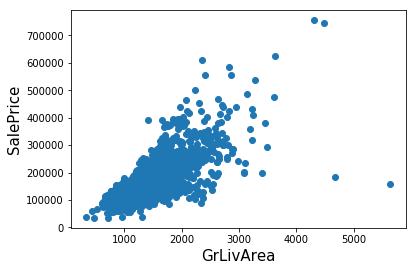

In [21]:
#산점도를 그려보고 이상치 확인
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
#house_df_org['GrLivArea']에서 봐야 함(왜곡도가 높은 칼럼이었기에 피처 로그변환에서 로그변환을 해주었던 칼럼이기 때문)
#(house_df_ohe['GrLivArea']는 로그변환이 되어있기에)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()


**이상치 데이터 삭제 후 재 학습/예측/평가**

In [318]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index, axis=0, inplace=True) # index니깐 row를 삭제하는거라서 axis=0 하는 것! 
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 282)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 282)


In [23]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.121
Lasso 로그 변환된 RMSE: 0.117


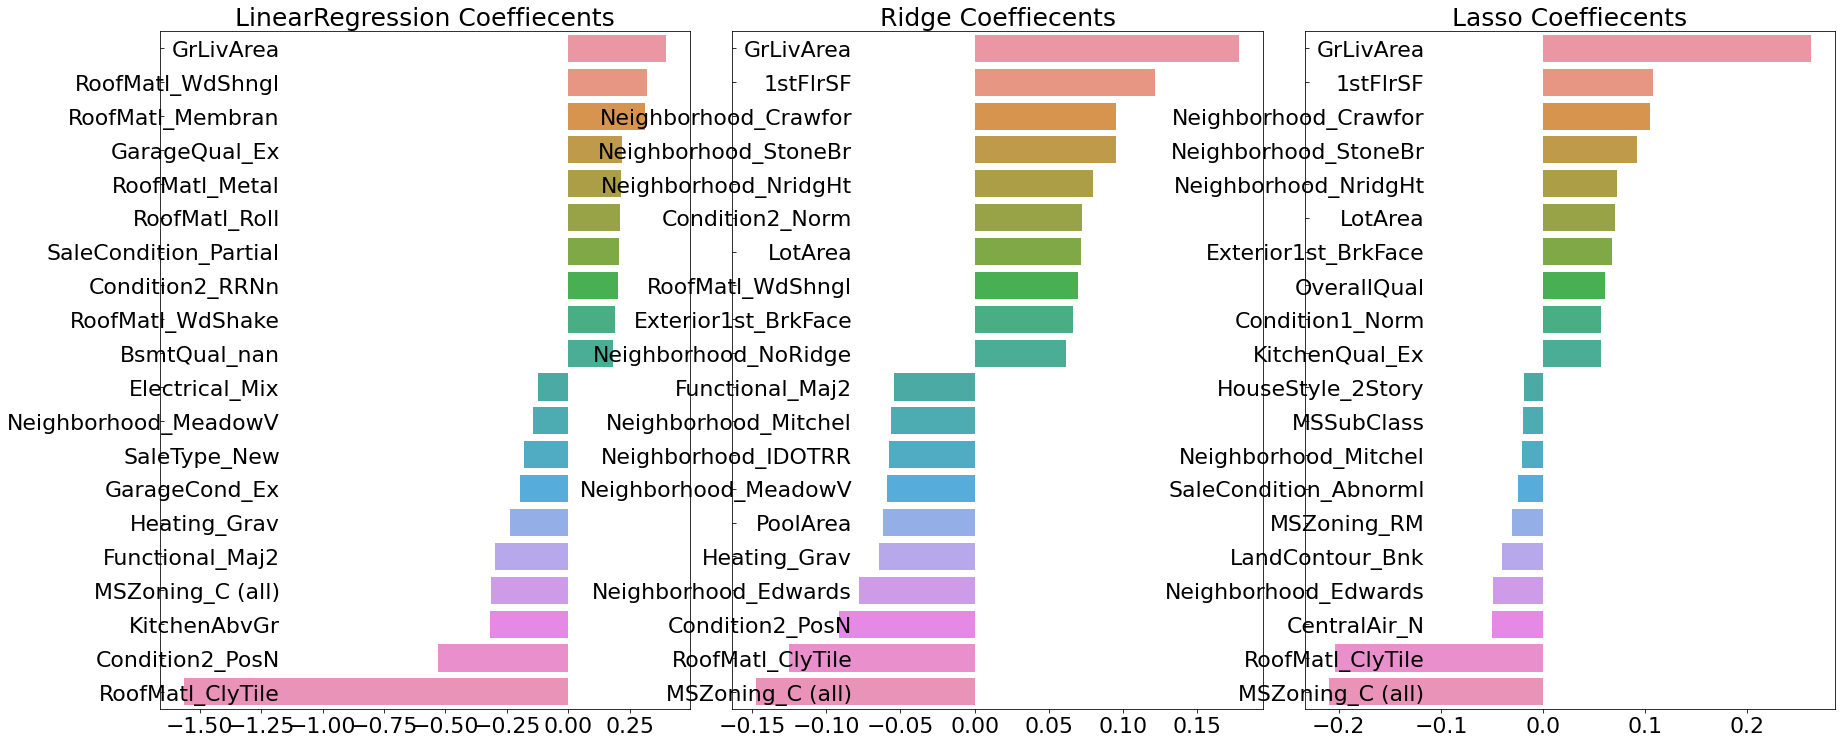

In [319]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 학습/예측/평가 

**XGBoost와 LightGBM 학습/예측/평가**

In [320]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8) #오버피팅을 줄이기 위해 colsample_bytree해서 칼럼을 50%만 샘플링 
best_xgb = get_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1246, 최적 alpha:{'n_estimators': 1000}


In [321]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1239, 최적 alpha:{'n_estimators': 1000}


**트리 회귀 모델의 피처 중요도 시각화**

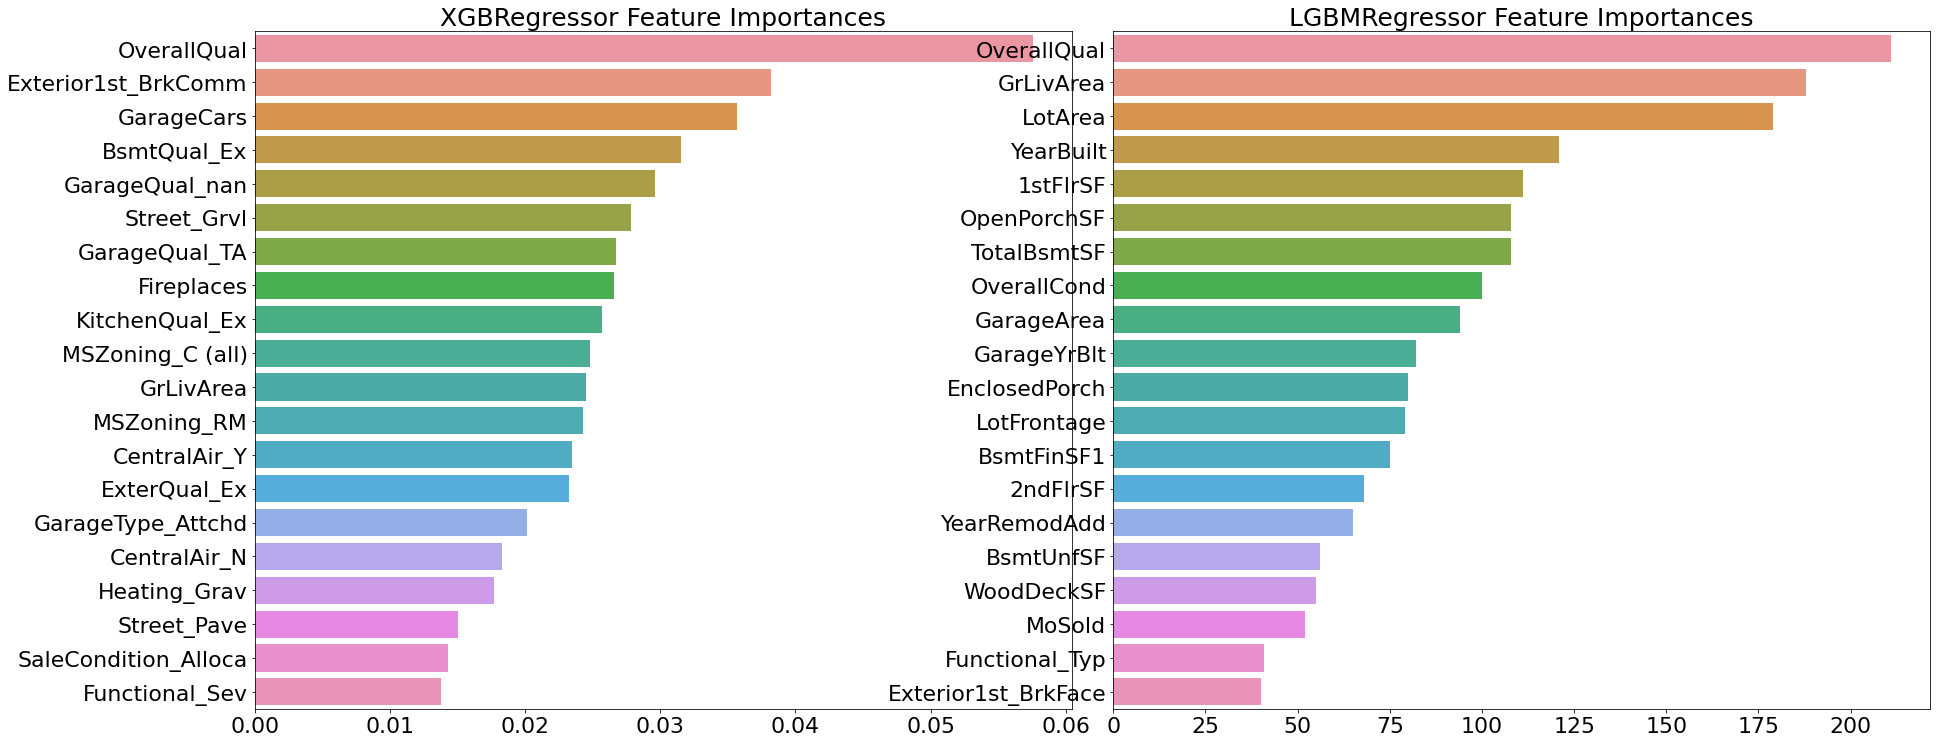

In [322]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)


### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [323]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))
        

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
# 혼합의 의미가 평균을 구하는 것에서 조금 가중치를 부여하는 것 
# 원래 2개의 pred 평균 구하게 되면 (ridge_pred+lasso_pred)/2 이다. 
# 즉, 0.5* ridge_pred + 0.5*lasso_pred 이것인데 여기에 조금 가중치를 부여해서 밑에 0.4, 0.6으로 바꿔준 것
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.11677764536910229
Ridge 모델의 RMSE: 0.12060323376214795
Lasso 모델의 RMSE: 0.11661739431196629


In [29]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred #(여기서는 그냥 2개의 pred값의 평균으로 해줌)
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.10120908122913022
XGBM 모델의 RMSE: 0.10669588503339805
LGBM 모델의 RMSE: 0.10321866205316597


### 스태킹 모델을 통한 회귀 예측

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

**기반 모델은 리지, 라소, XGBoost, LightGBM 으로 만들고 최종 메타 모델은 라소로 생성하여 학습/예측/평가**

In [31]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)



Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [32]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)



스태킹 회귀 모델의 최종 RMSE 값은: 0.09749379255891891
